<a href="https://colab.research.google.com/github/Marcelllino25/DataMining/blob/main/Tugas_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
uploaded = files.upload()

Saving personality_dataset.csv to personality_dataset.csv


In [50]:
# Import pustaka
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df = pd.read_csv("personality_dataset.csv")

In [52]:
print(df.head())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [53]:
mapping = {'Yes': 1, 'No': 0, 'Introvert': 0, 'Extrovert': 1}
df['Stage_fear'] = df['Stage_fear'].map(mapping)
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(mapping)
df['Personality'] = df['Personality'].map(mapping)

In [55]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [57]:
X = df_imputed.drop('Personality', axis=1)
y = df_imputed['Personality']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred, target_names=["Introvert", "Extrovert"]))


Akurasi: 0.9241379310344827

Laporan Klasifikasi:
               precision    recall  f1-score   support

   Introvert       0.91      0.94      0.92       278
   Extrovert       0.94      0.91      0.93       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



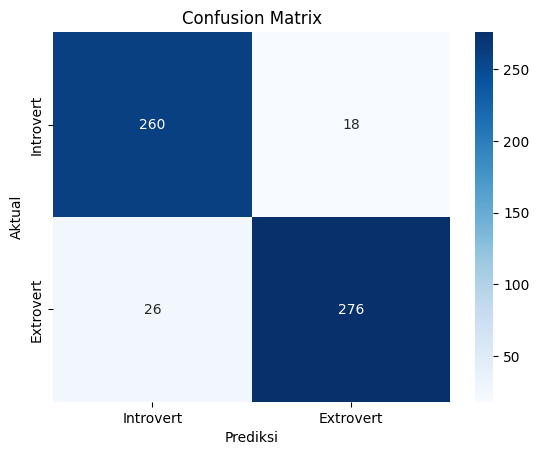

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Introvert", "Extrovert"], yticklabels=["Introvert", "Extrovert"])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Akurasi = {acc:.2f}")


K = 1 → Akurasi = 0.87
K = 2 → Akurasi = 0.88
K = 3 → Akurasi = 0.92
K = 4 → Akurasi = 0.92
K = 5 → Akurasi = 0.92
K = 6 → Akurasi = 0.93
K = 7 → Akurasi = 0.93
K = 8 → Akurasi = 0.93
K = 9 → Akurasi = 0.93
K = 10 → Akurasi = 0.93


In [72]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold CV
print("Akurasi cross-validation (mean):", scores.mean())


Akurasi cross-validation (mean): 0.9280172413793103


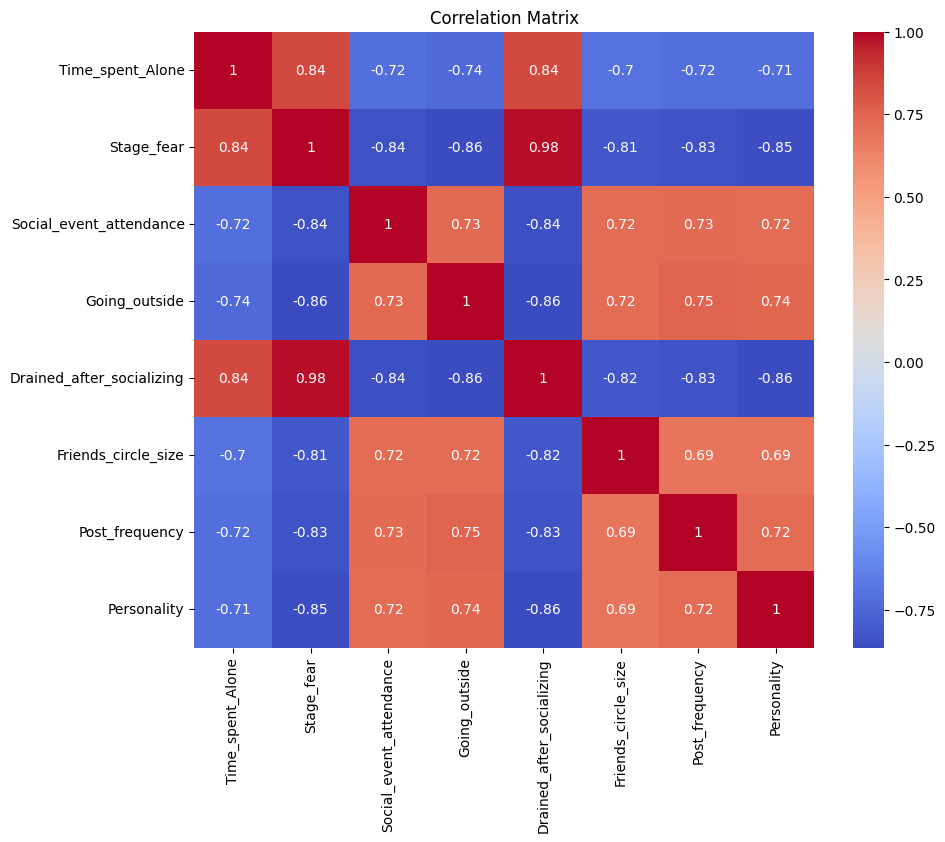

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasi antar fitur
corr = df_imputed.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


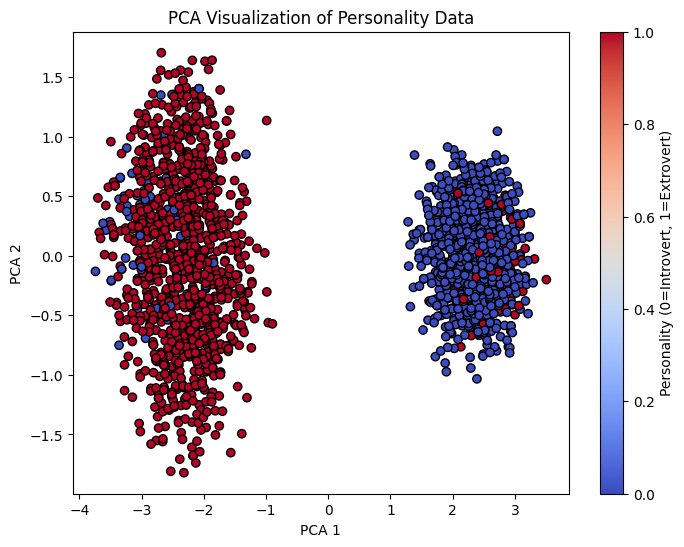

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Visualization of Personality Data')
plt.colorbar(label='Personality (0=Introvert, 1=Extrovert)')
plt.show()
